In [1]:
from archs.unet import unet
from archs.fcn8 import fcn8
from functions import *
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
tf.keras.backend.clear_session()

In [2]:
# Variables
filters = 8
epochs = 20
batch = 8
lung = True
sample_size = 2000

In [3]:
if lung:
    img_path = "./datasets/lungs/img"
    mask_path = "./datasets/lungs/mask"
    shape = (256,256,1)
    classes = 2
else:
    img_path = "./datasets/balanced_tomo/img"
    mask_path = "./datasets/balanced_tomo/mask"
    shape = (256,256,1)
    classes = 3

X_train, y_train = load_dataset_2(img_path, mask_path, classes, sample_size, (shape[0], shape[1]))# load_dataset(img_path, mask_path, classes, sample_size)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.25)
print(X_train.shape, X_test.shape)

(424, 256, 256) (142, 256, 256)


In [4]:
np.unique(y_train, return_counts = True)

(array([0, 1], dtype=uint8), array([20650117,  7137147], dtype=int64))

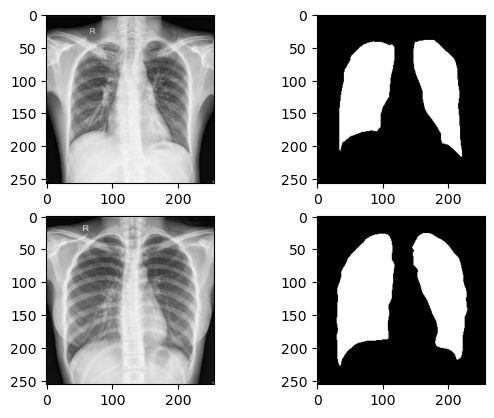

In [5]:
%matplotlib inline
from matplotlib import pyplot as plt

id = 15
if classes == 2:
    f, axarr = plt.subplots(2,2)
    axarr[0,0].imshow(X_train[id], cmap = 'gray')
    axarr[0,1].imshow(y_train[id,:,:], cmap = 'gray')
    axarr[1,0].imshow(X_test[id], cmap = 'gray')
    axarr[1,1].imshow(y_test[id,:,:], cmap = 'gray')
else:
    f, axarr = plt.subplots(2,2)
    axarr[0,0].imshow(X_train[id], cmap = 'gray')
    axarr[0,1].imshow(np.argmax(y_train[id,:,:], axis=-1), cmap = 'gray', vmin =0, vmax = 2)
    axarr[1,0].imshow(X_test[id], cmap = 'gray')
    axarr[1,1].imshow(np.argmax(y_test[id,:,:], axis=-1), cmap = 'gray', vmin =0, vmax = 2)    

plt.show()

In [6]:
model = unet(filters, classes, shape)
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3), 
              loss = [dice_loss],
              metrics = [dice_coefficient])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 16  160         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 256, 256, 16  64         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [7]:
np.unique(y_train, return_counts=True)

(array([0, 1], dtype=uint8), array([20650117,  7137147], dtype=int64))

In [8]:
checkpoint = ModelCheckpoint(filepath='model.h5', save_freq = 'epoch')
#model.load_weights("model.h5")
history = model.fit(X_train, y_train, epochs=epochs, batch_size = batch, callbacks = [checkpoint], validation_data=(X_test, y_test))

Epoch 1/20
53/53 [==============================] - 116s 787ms/step - loss: 0.4129 - dice_coefficient: 0.5871 - val_loss: 0.6019 - val_dice_coefficient: 0.3981
Epoch 2/20
53/53 [==============================] - 23s 431ms/step - loss: 0.0761 - dice_coefficient: 0.9239 - val_loss: 0.6329 - val_dice_coefficient: 0.3671
Epoch 3/20
53/53 [==============================] - 26s 482ms/step - loss: 0.0769 - dice_coefficient: 0.9231 - val_loss: 0.6209 - val_dice_coefficient: 0.3791
Epoch 4/20
53/53 [==============================] - 26s 494ms/step - loss: 0.0690 - dice_coefficient: 0.9310 - val_loss: 0.6305 - val_dice_coefficient: 0.3695
Epoch 5/20
53/53 [==============================] - 23s 429ms/step - loss: 0.0621 - dice_coefficient: 0.9379 - val_loss: 0.6305 - val_dice_coefficient: 0.3695
Epoch 6/20
53/53 [==============================] - 22s 407ms/step - loss: 0.0627 - dice_coefficient: 0.9373 - val_loss: 0.6239 - val_dice_coefficient: 0.3761
Epoch 7/20
53/53 [===========================

In [9]:
a = X_test[0:500]
b = y_test[0:500]
raw = model.predict(a)
#test = np.argmax(raw, axis=-1)
#mask_test = np.argmax(y_test[0:142], axis=-1)

5/5 [==============================] - 5s 398ms/step


In [10]:
b = np.argmax(raw, axis=-1)
np.unique(b, return_counts=True)

(array([0], dtype=int64), array([9306112], dtype=int64))

In [11]:
x = np.unique(np.argmax(raw, axis=-1), return_counts = True)
c = np.array(x)

In [12]:
c.shape[1]


1

In [13]:
y_test.shape

(142, 256, 256)

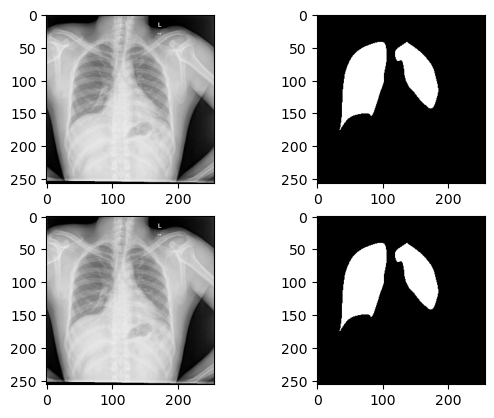

In [21]:
image_id = 12
if classes == 2:
    f, axarr = plt.subplots(2,2)
    axarr[0,0].imshow(X_test[image_id], cmap = 'gray')
    axarr[0,1].imshow(y_test[image_id,:,:], cmap = 'gray')
    axarr[1,0].imshow(X_test[image_id], cmap = 'gray')
    axarr[1,1].imshow(y_test[image_id,:,:], cmap = 'gray')
else:
    f, axarr = plt.subplots(2,2)
    axarr[0,0].imshow(X_test[image_id], cmap = 'gray')
    axarr[0,1].imshow(np.argmax(y_test[image_id,:,:], axis=-1), cmap = 'gray', vmin =0, vmax = 2)
    axarr[1,0].imshow(X_test[image_id], cmap = 'gray')
    axarr[1,1].imshow(np.argmax(raw[image_id,:,:], axis=-1), cmap = 'gray', vmin =0, vmax = 2)    

plt.show()

In [15]:
import pickle


with open('trainHistoryDict', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

In [16]:
import tensorflow.keras.backend as K
num_classes = K.int_shape(raw)[-1]

In [17]:
num_classes

1

In [18]:
np.unique(X_train, return_counts = True)

(array([0.        , 0.00392157, 0.00784314, 0.01176471, 0.01568627,
        0.01960784, 0.02352941, 0.02745098, 0.03137255, 0.03529412,
        0.03921569, 0.04313725, 0.04705882, 0.05098039, 0.05490196,
        0.05882353, 0.0627451 , 0.06666667, 0.07058824, 0.0745098 ,
        0.07843137, 0.08235294, 0.08627451, 0.09019608, 0.09411765,
        0.09803922, 0.10196078, 0.10588235, 0.10980392, 0.11372549,
        0.11764706, 0.12156863, 0.1254902 , 0.12941176, 0.13333333,
        0.1372549 , 0.14117647, 0.14509804, 0.14901961, 0.15294118,
        0.15686275, 0.16078431, 0.16470588, 0.16862745, 0.17254902,
        0.17647059, 0.18039216, 0.18431373, 0.18823529, 0.19215686,
        0.19607843, 0.2       , 0.20392157, 0.20784314, 0.21176471,
        0.21568627, 0.21960784, 0.22352941, 0.22745098, 0.23137255,
        0.23529412, 0.23921569, 0.24313725, 0.24705882, 0.25098039,
        0.25490196, 0.25882353, 0.2627451 , 0.26666667, 0.27058824,
        0.2745098 , 0.27843137, 0.28235294, 0.28